In [1]:
!pip install opencv-python scikit-image matplotlib


In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.filters import gabor
from skimage.color import rgb2gray
from skimage.feature import blob_log


In [5]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png -O sudoku.png


In [3]:
# Helper function to display images
def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


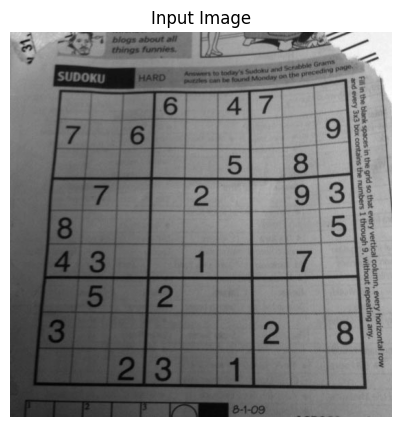

In [6]:
# Load image from local path
img = cv2.imread("sudoku.png")

if img is None:
    raise IOError("Image not loaded. Check file path.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Input Image", gray)


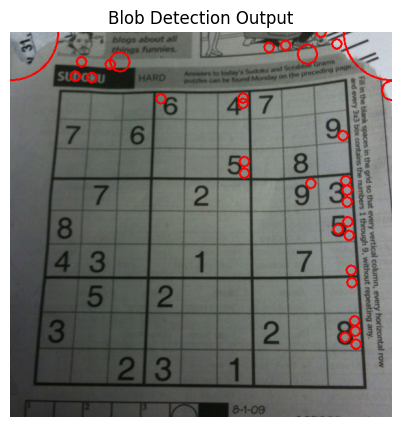

In [7]:
from skimage.feature import blob_log

blobs = blob_log(
    gray,
    min_sigma=5,
    max_sigma=50,
    num_sigma=10,
    threshold=0.1
)

blobs[:, 2] = blobs[:, 2] * np.sqrt(2)

blob_img = img.copy()
for y, x, r in blobs:
    cv2.circle(blob_img, (int(x), int(y)), int(r), (0, 0, 255), 2)

show_image("Blob Detection Output", cv2.cvtColor(blob_img, cv2.COLOR_BGR2RGB))


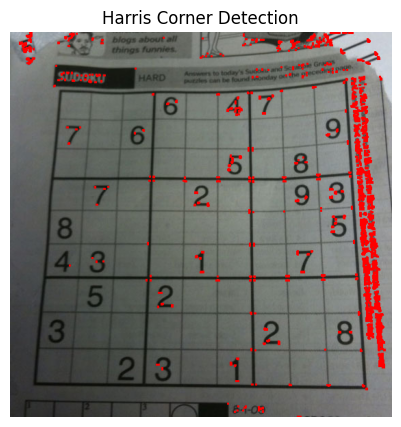

In [8]:
gray_harris = np.float32(gray)

dst = cv2.cornerHarris(gray_harris, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

harris_img = img.copy()
harris_img[dst > 0.01 * dst.max()] = [0, 0, 255]

show_image("Harris Corner Detection", cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))


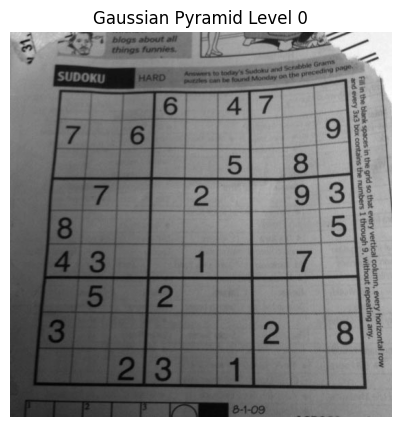

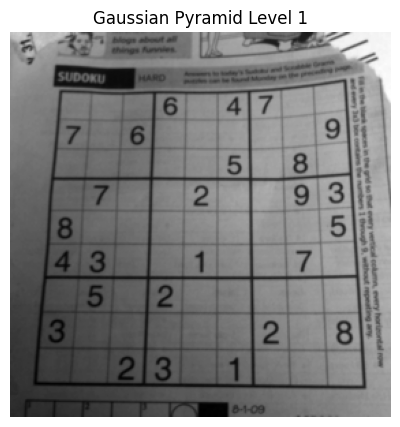

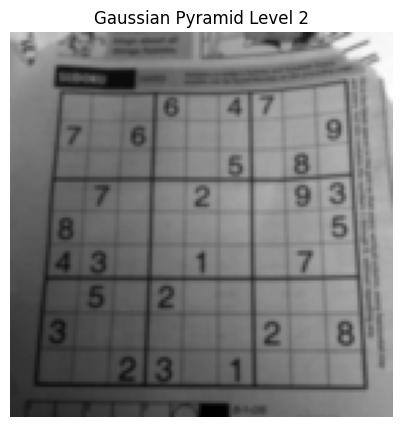

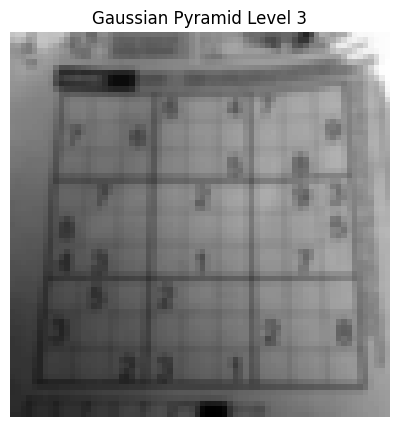

In [9]:
gp = [gray.copy()]
for i in range(3):
    gp.append(cv2.pyrDown(gp[-1]))

for i, g in enumerate(gp):
    show_image(f"Gaussian Pyramid Level {i}", g)


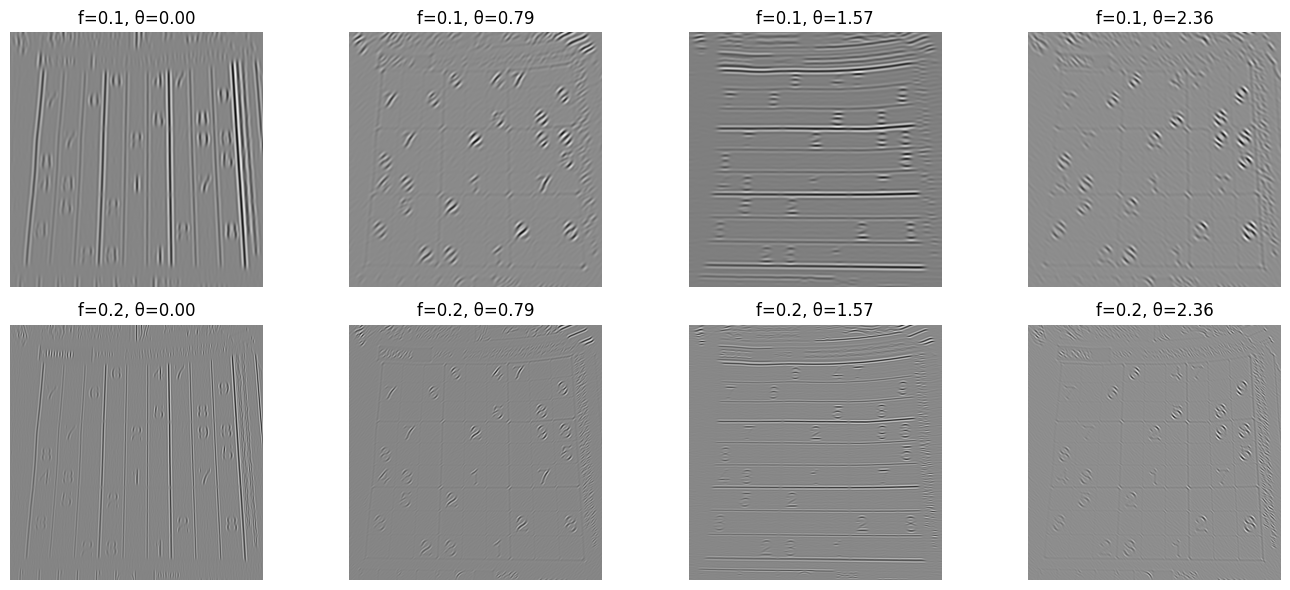

In [10]:
from skimage.color import rgb2gray
from skimage.filters import gabor

gray_gabor = rgb2gray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

frequencies = [0.1, 0.2]
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]

fig, axes = plt.subplots(2, 4, figsize=(14,6))

for i, freq in enumerate(frequencies):
    for j, theta in enumerate(thetas):
        real, imag = gabor(gray_gabor, frequency=freq, theta=theta)
        axes[i, j].imshow(real, cmap='gray')
        axes[i, j].set_title(f"f={freq}, θ={theta:.2f}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
